기한: 11월 27일 (월) 18시 30분

과제: 파이썬 머신러닝 완벽가이드 ch6. 4~5 pg. 396~408

필사하여 깃허브에 업로드하고, 깃허브 링크를 댓글로 달아주세요.

## 04. SVD (Singular Value Decomposition)

### SVD 개요 (특이값 분해)
SVD 역시 PCA와 유사한 행렬 분해 기법을 이용한다. PCA의 경우 정방행렬만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있다.

#### A = U∑Vt

SVD는 특이값 분해로 불리며, 행렬 U와 V에 속한 벡터는 특이벡터이며, 모든 특이벡터는 서로 직교하는 성질을 가진다. ∑는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0이다. ∑가 위치한 0이 아닌 값이 바로 행렬 A의 특이값이다. SVD는 A의 차원이 m x n일때 U의 차원이 m x m, ∑의 차원이 m x n, Vt의 차원이 n x n으로 분해된다.


In [1]:
# 넘파이의 SVD 모듈 import
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


이렇게 생성된 a행렬에 SVD를 적용해 U, sigma, Vt를 도출한다.

SVD 분해는 numpy.linalg.svd에 파라미터로 원본 행렬을 입력하면 U행렬, sigma행렬, V 전치 행렬을 반환한다.

Sigma행렬의 경우, A = U∑Vt에서 ∑행렬을 나타내며, ∑ 행렬의 경우 행렬의 대각에 위치한 값만 0이 아니고, 그렇지 않은 경우는 모두 0이므로 0이 아닌 값의 경우만 1차원 행렬로 표현한다.

In [2]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix : \n', np.round(U, 3))
print('Sigma Value : \n', np.round(Sigma, 3)) # 1차원
print('V transpose matrix : \n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix : 
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value : 
 [3.423 2.023 0.463 0.079]
V transpose matrix : 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


U 행렬이 4 x 4, Vt 행렬이 4 x 4로 반환됐고, Sigma의 경우는 1차원 행렬인 (4, )로 반환되었다.

분해된 이 U, Sigma, Vt를 이용해 다시 원본 해열로 정확히 복원되는지 확인해보자. 원본행렬로의 복원은 이 U, Sigma, Vt를 내적하면 된다. 한 가지 유의할 것은 Sigma의 경우 0이 아닌 값만 1차원으로 추출되었으므로 다시 0을 포함한 대칭행렬로 변환한 뒤에 내적을 수행해야한다는 것이다.

In [7]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)

# 내적
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


U, Sigma, Vt를 이용해 a_는 원본행렬 a와 동일하게 복원됨을 알 수 있다.

이번에는 데이터 세트가 로우 간 의존성이 있을 경우 어떻게 Sigma 값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아보겠다. 일부러 의존성을 부여하기 위해 a행렬의 3번째 로우를 '첫 번째 로우 + 두 번째 로우'로 업데이트하고, 4번째 로우는 첫 번째 로우와 같다고 업데이트한다.

In [8]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


이제 a행렬은 이전과 다르게 로우 간 관계가 매우 높아졌다. 이 데이터를 SVD로 다시 분해해보자.

In [9]:
# 다시 SVD를 수행해 Sigma값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value : \n', np.round(Sigma, 3))


(4, 4) (4,) (4, 4)
Sigma Value : 
 [2.663 0.807 0.    0.   ]


이전과 차원은 같지만 sigma값 중 2개가 0으로 변했다. 즉 선형독립인 로우 벡터의 개수가 2개라는 의미이다. (행렬의 랭크가 2라는 뜻)

이렇게 분해된 u, sigma, vt를 이용해 다시 원본 행렬로 복원해보자. 이번에는 u, sigma, vt의 전체 데이터를 이용하지 않고 sigma의 0에 대응되는 u, sigma, vt의 데이터를 제외하고 복원한다. 즉, sigma의 경우 앞의 2개 요소만 0이 아니므로 u행렬 중 선행 두 개의 열만 추출하고, Vt의 경우는 선행 두 개의 행만 추출해 복원하는 것이다.

In [10]:
# U행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])

# V 전치행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


이번에는 Truncate SVD를 이용해 행렬을 분해한다. Truncated SVD는 ∑ 행렬에 있는 대각 원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식이다. 이렇게 분해하면 인위적으로 더 작은 차원의 U, ∑, Vt로 분해하기 때문에 원본 행렬을 정확하게 다시 원복할 수는 없다. 하지만 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사할 수는 있다. 당연한 얘기지만, 원래 차원의 차수에 가깝게 잘라낼수록 (truncate) 원본 행렬에 더 가깝게 복원할 수 있다.

truncated SVD를 Scipy 모듈을 이용해 간단하게 테스트해보자. Truncated SVD는 넘파이가 아닌 Scipy에서만 지원한다. Scipy는 SVD뿐만 아니라 Truncated SVD도 지원한다. 일반적으로 Scipy의 SVD는 scipy.linalg.svd를 이용하면 되지만, Truncated SVD는 희소 행렬로만 지원되어 scipy.sparse.linalg.svds 를 이용해야 한다.

임의의 6 x 6 원본 행렬을 Normal SVD로 분해해 분해된 행렬의 차원과 Sigma 행렬 내의 특이값을 확인한 뒤 다시 Truncated SVD로 분해해 분해된 행렬의 차원, Sigma 행렬 내의 특이값, 그리고 Truncated SVD로 분해된 행렬의 내적을 계산하여 다시 복원된 데이터와 원본 데이터를 비교해보자

In [12]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬 : \n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원 : ', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬 : ', Sigma)

# Truncated SVD로 Sigma행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4  # 6개 중 4개만 선택
U_tr, Sigma_tr, Vt_tr = svds(matrix, k = num_components)
print('\nTruncated SVD 분해 행렬 차원 : ', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬 : ', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of Truncated SVD

print('\nTruncated SVD로 분해 후 복원 행렬 :\n', matrix_tr)

원본 행렬 : 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원 :  (6, 6) (6,) (6, 6)

Sigma값 행렬 :  [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원 :  (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬 :  [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬 :
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 

6x6 행렬을 SVD 분해하면 U, Sigma, Vt가 각각 (6, 6), (6, ), (6, 6) 차원이지만, Truncated SVD의 n_components를 4로 설정해 U, Sigma, Vt를 가각 (6, 4), (4, ), (4, 6)으로 분해했다. Truncated SVD로 분해된 행렬로 다시 복원할 경우 완벽하게 복원되지 않고 근사적으로 복원됨을 알 수 있다.

### 사이킷런 TruncatedSVD 클래스를 이용한 변환

사이킷런의 Truncated SVD 클래스는 사이파이의 svds와 같이 Truncated SVD 연산을 수행해 원본 행렬을 분해한 U, Sigma, Vt행렬을 반환하지는 않는다. 사이킷런의 Truncated SVD클래스는 PCA 클래스와 유사하게 fit()과 transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트 (즉, Truncated SVD의 K 컴포넌트 수 )로 차원을 축소해 변환한다. 원본 데이터를 Truncated SVD 방식으로 분해된 U * Sigma 행렬에 선형 변환해 생성한다.

Text(0, 0.5, 'Truncated SVD Component 2')

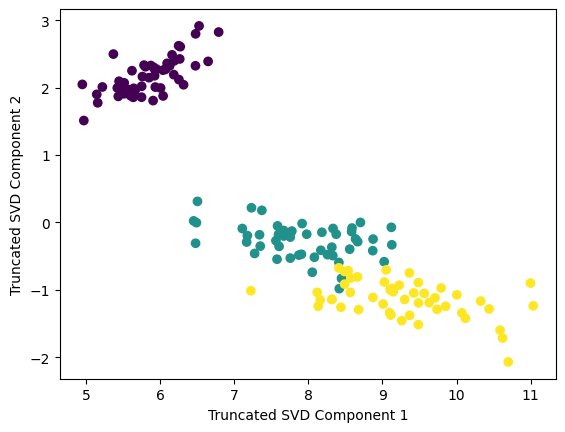

In [13]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 컴포넌트로 Truncated SVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 Truncated SVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x = iris_tsvd[:, 0], y = iris_tsvd[:, 1], c = iris.target)
plt.xlabel('Truncated SVD Component 1')
plt.ylabel('Truncated SVD Component 2')

Truncated SVD 변환 역시 PCA 변환과 유사하게 변환 후에 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음을 알 수 있다.

사이킷런의 Truncated SVD 와 PCA클래스 구현을 조금 더 자세히 들여다보면 두 개 클래스 모두 SVD를 이용해 행렬을 분해한다. 붓꽃 데이터를 스케일링으로 변환한 뒤에 Truncated SVD와 PCA클래스 변환을 해 보면 두 개가 거의 동일함을 알 수 있다.

Text(0.5, 1.0, 'PCA Transformed')

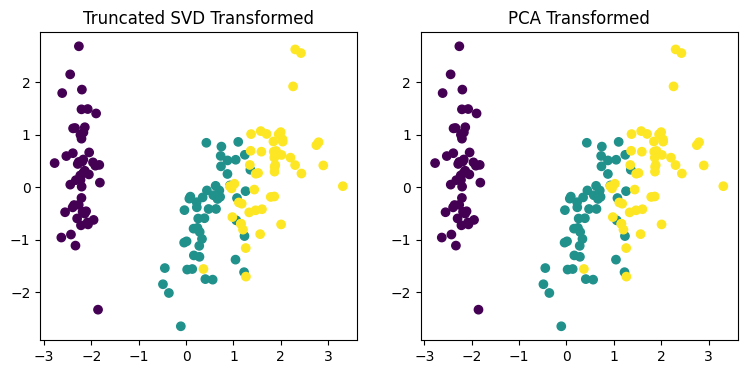

In [15]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 Truncated SVD 변환수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# Truncated SVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize = (9, 4), ncols = 2)
ax1.scatter(x = iris_tsvd[:, 0], y = iris_tsvd[:, 1], c = iris.target)
ax2.scatter(x = iris_pca[:, 0], y = iris_pca[:, 1], c = iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

두 개의 변환 행렬 값과 원복 속성별 컴포넌트 비율 값을 실제로 서로 비교해보면 거의 같음을 알 수 있다.

In [16]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.319070861271181e-15
-1.1666015375944028e-16


## 05. NMF (Non-Negative Matrix Factorization)

### NMF 개요
NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형이다. NMF는 원본 행렬 내의 모든 원소 값이 모두 양수라는게 보장되면 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭한다.

C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

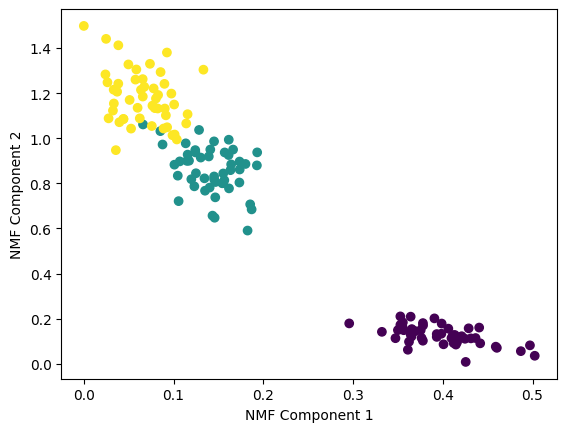

In [17]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x = iris_nmf[:, 0], y = iris_nmf[:, 1], c = iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

NMF도 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링에 잘 사용된다. 또한 영화 추천과 같은 추천(Recommendations) 영역에 활발하게 적용된다. 사용자의 상품 (예 : 영화) 평가 데이터 세트인 사용자 - 평가 순위 (User-Rating) 데이터 세트를 행렬 분해 기법을 통해 분해하면서 사용자가 평가하지 않은 상품에 대한 잠재적인 요소를 추출해 이를 통해 평가 순위 (Rating)을 예측하고, 높은 순위로 예측된 상품을 추천해주는 방식이다. (이를 잠재 요소 (Latent Factoring) 기반의 추천 방식이라고 한다.)

## 06. 정리

지금까지 대표적인 차원축소 알고리즘인 PCA, LDA, SVD, NMF에 대해 알아보았다. 많은 피처로 이루어진 데이터 세트를 PCA같은 차원 축소를 통해 더욱 직관적으로 이해할 수 있었다. 무엇보다도 차원 축소는 단순히 피처의 개수를 줄이는 개념보다는 이를 통해 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데 큰 의미가 있다. 이 때문에 많은 차원을 가지는 이미지나 텍스트에서 PCA, SVD 등의 차원 축소 알고리즘이 활발하게 사용된다.

PCA는 입력 데이터의 변동성이 가장 큰 축을 구하고, 다시 이 축에 직각인 축을 반복적으로 축소하려는 차원의 개수만큼 구한 뒤 입력 데이터를 이 축들에 투영해 차원을 축소하는 방식이다. 이를 위해 입력 데이터의 공분산 행렬을 기반으로 고유벡터를 생성하고 이렇게 구한 고유 벡터에 입력 데이터를 선형 변환하는 방식이다.

LDA는 PCA와 매우 유사한 방식이며, PCA가 입력 데이터의 변동성의 가장 큰 축을 찾는데 반해 LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원을 축소한다.

SVD와 NMF는 매우 많은 피처 데이터를 가진 고차원행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법이다. 특히 이러한 행렬 분해를 수행하면서 원본 행렬에서 잠재된 요소를 추출하기 때문에 토픽 모델링이나 추천 시스템에서 활발하게 사용된다.